## Prueba Grafos

In [97]:
from DISClib.ADT import graph as g
from DISClib.ADT import list as lt
from DISClib.DataStructures import edge as e
from DISClib.ADT import stack
from DISClib.Algorithms.Graphs import bellmanford as bf
from DISClib.Algorithms.Graphs import bfs
from DISClib.Algorithms.Graphs import cycles as c
from DISClib.Algorithms.Graphs import dfs
from DISClib.Algorithms.Graphs import dfo
from DISClib.Algorithms.Graphs import prim
from DISClib.Algorithms.Graphs import scc
from DISClib.Algorithms.Graphs import dijsktra as djk
from DISClib.ADT import queue as q
from graphviz import Digraph, Graph

def displayGraph(estructura, tipo, label, nodosX=list(), edgesX=list()):
    nodes = estructura.getNodeValues()
    edges = estructura.getEdgeValues()
    edgesAux = estructura.getEdgeValues()
    for i,j,k in edges:
        if j not in nodes:
            edgesAux.remove((i,j,k))    
    edges = edgesAux
    if tipo == 4:
        dot = Digraph()
    else:
        dot = Graph()
    
    dot.graph_attr = {
        'rankdir': 'TB',
        'center': 'true',
        'size':'14,5',
        'ratio':'auto',
        'layout': 'neato',
        'mode': 'sgd',
    }
    
    for i in nodes:
        if i in nodosX:
            dot.node(name=i, label=i, shape='circle',color='red')
        else:
            dot.node(name=i, label=i, shape='circle',color='black')
    if tipo == 4:
        for i,j,k in edges:
            if (i,j) in edgesX:
                if label:
                    dot.edge(i, j, label=str(round(k,2)), color='red', fontsize='8.0')
                else:
                    dot.edge(i, j, color='red')
            else:
                if label:
                    dot.edge(i, j, label=str(round(k,2)), color='black', fontsize='8.0')
                else:
                    dot.edge(i, j, color='black')
    else:
        tuples = list()
        for i,j,k in edges:
            inv = (j, i)
            if inv not in tuples:
                if (i,j) in edgesX or inv in edgesX:
                    if label:
                        dot.edge(i, j, label=str(round(k,2)), color='red', fontsize='8.0')
                    else:
                        dot.edge(i, j, color='red')
                else:
                    if label:
                        dot.edge(i, j, label=str(round(k,2)), color='black', fontsize='8.0')
                    else:
                        dot.edge(i, j, color='black')
            tuples.append((i, j))
    display(dot)


In [98]:
class grafo:
    def __init__(self, type='Undirected'):               # done
        if type == 'Directed':
            self.estructura = g.newGraph(size=10, directed=True)
        else:
            self.estructura = g.newGraph(size=10)

    def addNode_byValue(self, infoNodo):    #done
        infoNodo = str(infoNodo)
        self.estructura = g.insertVertex(self.estructura, infoNodo)

    def addEdge_byValue(self, infoNodo_1, infoNodo_2, weight=0): #done
        infoNodo_1 = str(infoNodo_1)
        infoNodo_2 = str(infoNodo_2)
        self.estructura = g.addEdge(self.estructura, infoNodo_1, infoNodo_2, weight)

    def deleteNode_byValue(self, infoNodo): #done
        infoNodo = str(infoNodo)
        self.estructura = g.removeVertex(self.estructura, infoNodo)

    def deleteEdge_byValue(self, infoNodo_1, infoNodo_2):
        #TODO
        pass

    def getEdgeValues(self):                #done
        lst = list()
        iter = lt.iterator(g.edges(self.estructura))
        aux = ()
        for i in iter:
            aux = (i['vertexA'],i['vertexB'],i['weight'])
            lst.append(aux)
        return lst            
    
    def getNodeValues(self):                #done
        lst = list()
        iter = lt.iterator(g.vertices(self.estructura))
        for i in iter:
            lst.append(i)
        return lst

    def isNodeValue(self, infoNodo):        #done
        infoNodo = str(infoNodo)
        return g.containsVertex(self.estructura, infoNodo)

    def findAdjacentNode(self, infoNodo):   #done
        infoNodo = str(infoNodo)
        lst = list()
        try:
            iter = lt.iterator(g.adjacents(self.estructura, infoNodo))
            for i in iter:
                lst.append(i)
        except:
            pass
        return lst
    
    def algorithms(self, algoritmo, infoNodo=None):
        if infoNodo != None:
            infoNodo = str(infoNodo)
        table = list()
        if algoritmo == 'Bellman-Ford':
            search = bf.BellmanFord(self.estructura, infoNodo)
            for i in self.getNodeValues():
                costo = bf.distTo(search, i)
                path = list()
                if bf.hasPathTo(search, i):
                    iter = lt.iterator(bf.pathTo(search, i))
                    for j in iter:
                        path.append((j['vertexA'], j['vertexB']))
                else:
                    costo = 'inf'    
                my_dict = {'node': i, 'cost': costo, 'path': path}
                table.append(my_dict)
                
        if algoritmo == 'BreadhtFirstSearch':
            search = bfs.BreadhtFisrtSearch(self.estructura, infoNodo)
            for i in self.getNodeValues():
                if bfs.hasPathTo(search, i):
                    table.append(i)
                
        if algoritmo == "DirectedCycle":
            search = c.DirectedCycle(self.estructura)
            if c.hasCycle(search):
                pathRta = c.cycle(search)
                while not stack.isEmpty(pathRta):
                    edge = stack.pop(pathRta)
                    table.append((edge['vertexA'], edge['vertexB']))
        
        if algoritmo == 'DepthFirstSearch':
            search = dfs.DepthFirstSearch(self.estructura, infoNodo)
            for i in self.getNodeValues():
                if dfs.hasPathTo(search, i):
                    table.append(i)
        
        if algoritmo == 'DepthFirstOrder':
            search = dfo.DepthFirstOrder(self.estructura)
            while not stack.isEmpty(search['reversepost']):
                top = stack.pop(search['reversepost'])
                table.append(top)
                
        if algoritmo == 'PrimMST':
            search = prim.PrimMST(self.estructura, infoNodo)
            weight = prim.weightMST(self.estructura, search)
            path = search['mst']
            while not q.isEmpty(path):
                edge = q.dequeue(path)
                table.append((edge['vertexA'], edge['vertexB']))
            return table, weight
        
        if algoritmo == 'KosarajuSCC':
            sc = scc.KosarajuSCC(self.estructura)
            elements = sc['idscc']['table']['elements']
            table = dict()
            for i in elements:
                if i['value'] != None:
                    try:
                        lista = table[i['value']]
                        lista.append(i['key'])
                        table[i['value']] = lista
                    except:
                        table[i['value']] = [i['key']]
        
        if algoritmo == 'Dijkstra':
            search = djk.Dijkstra(self.estructura, infoNodo)
            for i in self.getNodeValues():
                if djk.hasPathTo(search, i):
                    path = djk.pathTo(search, i)
                    aux = dict()
                    pathList = list()
                    while not stack.isEmpty(path):
                        edge = stack.pop(path)
                        pathList.append((edge['vertexA'], edge['vertexB']))
                    aux['node'] = i
                    aux['path'] = pathList
                    aux['cost'] = djk.distTo(search, i)
                    table.append(aux)            
        return table

In [99]:
nodos = [24, 38, 21, 49, 18, 22, 3, 16, 31, 39, 20]
edges = [(3,18,30.95), (22,3,35.15), (18,38,4.43), (31,3,18.08), (49,3,32.4), (24,31,46.88), (3,21,46.86), (39,16,30.32), (21,24,15.93), (22,20,40.66), (49,39,44.37), (3,16,34.86)]
estructura = grafo('Directed')
#estructura = grafo()
for i in nodos:
    estructura.addNode_byValue(i)
for i,j,k in edges:
    estructura.addEdge_byValue(i,j,k)

In [100]:
rta = estructura.algorithms('Dijkstra', '3')
for i in rta:
    print(i)

{'node': '21', 'path': [('3', '21')], 'cost': 46.86}
{'node': '3', 'path': [], 'cost': 0}
{'node': '16', 'path': [('3', '16')], 'cost': 34.86}
{'node': '38', 'path': [('3', '18'), ('18', '38')], 'cost': 35.379999999999995}
{'node': '24', 'path': [('3', '21'), ('21', '24')], 'cost': 62.79}
{'node': '18', 'path': [('3', '18')], 'cost': 30.95}
{'node': '31', 'path': [('3', '21'), ('21', '24'), ('24', '31')], 'cost': 109.67}


In [101]:
rta = estructura.algorithms('KosarajuSCC')
print(rta)

{5: ['31', '21', '24', '3'], 3: ['18'], 2: ['38'], 6: ['22'], 4: ['16'], 7: ['39'], 1: ['20'], 8: ['49']}


In [102]:
mst, weight = estructura.algorithms('PrimMST', '3')
print(mst)
print(weight)

[('31', '3'), ('39', '16'), ('18', '38'), ('21', '24'), ('3', '18'), ('24', '31')]
146.59


In [103]:
rta = estructura.algorithms('DepthFirstOrder')
print(rta)

['22', '49', '20', '21', '24', '31', '3', '18', '38', '39', '16']


In [104]:
rta = estructura.algorithms('DirectedCycle')
print(rta)

[('21', '24'), ('24', '31'), ('31', '3'), ('3', '21')]


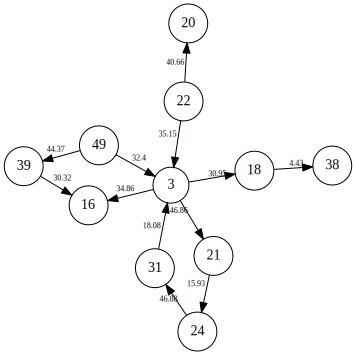

In [105]:
displayGraph(estructura, 4, True, nodosX=list(), edgesX=list())

In [106]:
# retorna una lista de diccionarios
# cada diccionario tiene: 'node', 'cost', 'path' 
nodoOrigen = 3
bellman = estructura.algorithms('BellmanFord', nodoOrigen)
print(bellman)
for rta in bellman:
    print(rta['node'], rta['cost'], rta['path'])

[{'node': '39', 'cost': 'inf', 'path': []}, {'node': '21', 'cost': 46.86, 'path': [('3', '21')]}, {'node': '3', 'cost': 0.0, 'path': []}, {'node': '20', 'cost': 'inf', 'path': []}, {'node': '16', 'cost': 34.86, 'path': [('3', '16')]}, {'node': '38', 'cost': 35.379999999999995, 'path': [('18', '38'), ('3', '18')]}, {'node': '49', 'cost': 'inf', 'path': []}, {'node': '24', 'cost': 62.79, 'path': [('21', '24'), ('3', '21')]}, {'node': '18', 'cost': 30.95, 'path': [('3', '18')]}, {'node': '22', 'cost': 'inf', 'path': []}, {'node': '31', 'cost': 109.67, 'path': [('24', '31'), ('21', '24'), ('3', '21')]}]
39 inf []
21 46.86 [('3', '21')]
3 0.0 []
20 inf []
16 34.86 [('3', '16')]
38 35.379999999999995 [('18', '38'), ('3', '18')]
49 inf []
24 62.79 [('21', '24'), ('3', '21')]
18 30.95 [('3', '18')]
22 inf []
31 109.67 [('24', '31'), ('21', '24'), ('3', '21')]


In [107]:
# retorna una lista con todos los nodos a los que se puede llegar desde el nodo origen
bfsRta = estructura.algorithms('BreadhtFirstSearch','3')
print(bfsRta)

['21', '3', '16', '38', '24', '18', '31']


In [108]:
# retorna una lista con todos los nodos a los que se puede llegar desde el nodo origen
dfsRta = estructura.algorithms('DepthFirstSearch','3')
print(dfsRta)

['21', '3', '16', '38', '24', '18', '31']


* Depth-first search (DFS) is an algorithm for traversing or searching a graph. It starts at a given vertex and explores all the vertices that are reachable from it, in a depth-first manner.
* Breadth-first search (BFS) is an algorithm for traversing or searching a graph. It starts at a given vertex and explores all the vertices that are reachable from it, in a breadth-first manner.
* The depth-first order of a directed graph is a linear ordering of the vertices of the graph such that for every edge (u, v) from vertex u to vertex v, v appears after u in the ordering. In other words, the depth-first order of a directed graph is a list of the vertices of the graph such that for every edge (u, v) in the graph, the position of v in the list is greater than the position of u.

The main differences between these three algorithms are:

* DFS and BFS are algorithms for traversing or searching a graph, while the depth-first order is a linear ordering of the vertices of a graph.
* DFS and BFS differ in the order in which they visit the vertices of a graph. DFS visits the vertices in a depth-first manner, while BFS visits the vertices in a breadth-first manner.
* The depth-first order of a graph is determined by the order in which the vertices are visited by a DFS algorithm. It is not directly related to the traversal order of BFS.

In [109]:
'''
Retorna una lista de nodos
Lista de vertices en el orden de DFS
'''#
DepthFirstSearch = ['31', '21', '24', '3', '18', '16', '38']

'''
Retorna una lista de nodos
Lista de vertices en el orden de BFS
'''#
BreadhtFirstSearch = ['31', '21', '24', '3', '18', '16', '38']

'''
Retorna una lista de nodos
Lista de vertices en el orden de DFO
'''#
DepthFirstOrder = ['49', '39', '22', '20', '31', '3', '16', '21', '24', '18', '38']

'''
Retorna dos valores: mst, weight
        * mst: lista de edges (origen, destino)
        * weight: costo total del MST
El conjunto de edges conforman el MST (minimum spanning tree)
'''
PrimMST = [('3', '21'), ('21', '24'), ('31', '3'), ('3', '18'), ('3', '16'), ('18', '38')]
        # 151.11

'''
Retorna un diccionario.
Cada llave corresponde a una componente fuertemente conectada,
los valores asociados a cada llave (valor) es una lista con los nodos que hacen parte de dicha componente conectada
'''#        
KosarajuSCC = {6: ['31', '21', '3', '24'], 4: ['18'], 7: ['22'], 2: ['20'], 1: ['16'], 3: ['38'], 5: ['39'], 8: ['49']}

'''
Retorna una lista de diccionarios.
Cada diccionario tiene 3 keys: node, cost, path
        * node: nodo
        * costo: costo de ir del nodo origen al nodo especificado (solo estan los nodos a los cuales hay camino)
        * path: lista de edges (origen, destino)
'''#
Dijkstra = [{'node': '21', 'path': [('3', '21')], 'cost': 46.86},
            {'node': '3', 'path': [], 'cost': 0},
            {'node': '16', 'path': [('3', '16')], 'cost': 34.86},
            {'node': '38', 'path': [('3', '18'), ('18', '38')], 'cost': 35.379999999999995},
            {'node': '24', 'path': [('3', '21'), ('21', '24')], 'cost': 62.79},
            {'node': '18', 'path': [('3', '18')], 'cost': 30.95},
            {'node': '31', 'path': [('3', '21'), ('21', '24'), ('24', '31')], 'cost': 109.67}]

'''
Retorna una lista de edges (origen, destino) que corresponde a un ciclo
Si hay mas de un ciclo en el grafo, solo se retorna uno
'''#
DirectedCycle = [('31', '3'), ('3', '21'), ('21', '24'), ('24', '31')]

'''
Retorna una lista de diccionarios.
Cada diccionario tiene 3 keys: node, cost, path
        * node: nodo
        * costo: costo de ir del nodo origen al nodo especificado (si no hay camino, el costo es 'inf')
        * path: lista de edges (origen, destino)
'''#
BellmanFord = [{'node': '38', 'cost': 35.379999999999995, 'path': [('18', '38'), ('3', '18')]}, 
               {'node': '20', 'cost': 'inf', 'path': []}, 
               {'node': '16', 'cost': 34.86, 'path': [('3', '16')]}, 
               {'node': '21', 'cost': 46.86, 'path': [('3', '21')]}, 
               {'node': '3', 'cost': 0.0, 'path': []}, 
               {'node': '24', 'cost': 62.79, 'path': [('21', '24'), ('3', '21')]}, 
               {'node': '31', 'cost': 109.67, 'path': [('24', '31'), ('21', '24'), ('3', '21')]}, 
               {'node': '22', 'cost': 'inf', 'path': []}, {'node': '49', 'cost': 'inf', 'path': []}, 
               {'node': '18', 'cost': 30.95, 'path': [('3', '18')]}, 
               {'node': '39', 'cost': 'inf', 'path': []}]

In [3]:
Dijkstra = [{'node': '21', 'path': [('3', '21')], 'cost': 46.86},
            {'node': '3', 'path': [], 'cost': 0},
            {'node': '16', 'path': [('3', '16')], 'cost': 34.86},
            {'node': '38', 'path': [('3', '18'), ('18', '38')], 'cost': 35.379999999999995},
            {'node': '24', 'path': [('3', '21'), ('21', '24')], 'cost': 62.79},
            {'node': '18', 'path': [('3', '18')], 'cost': 30.95},
            {'node': '31', 'path': [('3', '21'), ('21', '24'), ('24', '31')], 'cost': 109.67}]


['31', '3', '21', '24']
